# Getting Started

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
DATA_FOLDER = "data/"

CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"
NAME_DATASET = DATA_FOLDER+"name.clusters.txt"
PLOT_SUMM_DATASET = DATA_FOLDER+"plot_summaries.txt"
TVTROPES_DATASET = DATA_FOLDER+"tvtropes.clusters.txt"
character_metadata = pd.read_csv(CHARACTER_DATASET, sep='\t')
column_names = ['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_Release_Date', 'Character_Name', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release', 'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID', 'Freebase_Actor_ID']
character_metadata.columns = column_names
movies_column_names = ['Wikipedia_Movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date','Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']
movies = pd.read_csv(MOVIE_DATASET, sep='\t', header=None,names=movies_column_names, decimal='.' )
movies.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/character.metadata.tsv'

We want to look at the character ethnicity representation depending on the country. Therefore, we can merge the character dataset with the column from the movie dataset containing the country of each film.  

In [18]:
character_countries = pd.merge(character_metadata,movies[['Wikipedia_Movie_ID', 'Movie_countries']], on = 'Wikipedia_Movie_ID')
character_countries.head()

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Movie_countries
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,"{""/m/09c7w0"": ""United States of America""}"
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,"{""/m/09c7w0"": ""United States of America""}"
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,"{""/m/09c7w0"": ""United States of America""}"
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,"{""/m/09c7w0"": ""United States of America""}"
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0,"{""/m/09c7w0"": ""United States of America""}"


## Actor ethnicity

The theme of our project is the impact of 9/11 in the US. Therefore, the subsequnet analysis will be US oriented.  

In [25]:
# Convert `Movie_Release_Date` to datetime format if needed and then extract the release year
# we used format = 'mixed' to include both day-month-year and month-day-year shape
character_countries['Movie_Release_Date'] = pd.to_datetime(character_countries['Movie_Release_Date'], format = 'mixed', errors='coerce')
character_countries['Movie_Release_Year'] = character_countries['Movie_Release_Date'].dt.year

In [26]:
character_countries.head(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Movie_countries
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,"{""/m/09c7w0"": ""United States of America""}"
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,"{""/m/09c7w0"": ""United States of America""}"
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,"{""/m/09c7w0"": ""United States of America""}"
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,"{""/m/09c7w0"": ""United States of America""}"
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0,"{""/m/09c7w0"": ""United States of America""}"


First we need to remove every row where the actor ethnicty has a Nan value and the country is not US.

In [31]:
character_US = character_countries.dropna(subset=['Actor_Ethnicity'])
character_US = character_US.loc[character_US['Movie_countries'].str.contains("United States of America")]
character_US.head()
1

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Movie_countries
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,"{""/m/09c7w0"": ""United States of America""}"
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,"{""/m/09c7w0"": ""United States of America""}"
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001.0,"{""/m/09c7w0"": ""United States of America""}"
10,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,2001.0,"{""/m/09c7w0"": ""United States of America""}"
26,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,2000.0,"{""/m/09c7w0"": ""United States of America""}"


From now we first take a look at the top 10 most represented ethnicities in actor.

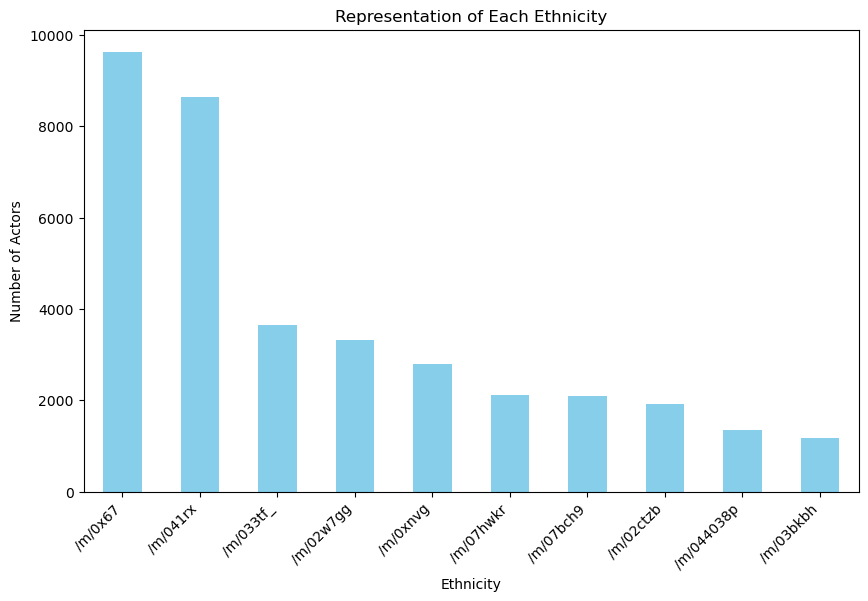

In [32]:
# Count the occurrences of each ethnicity
ethnicity_top10 = character_US['Actor_Ethnicity'].value_counts().nlargest(10)

# Plot the distribution of each ethnicity
plt.figure(figsize=(10, 6))
ethnicity_top10.plot(kind='bar', color='skyblue')
plt.title("Representation of Each Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Actors")
plt.xticks(rotation=45, ha='right')
plt.show()


From this top 10 we now look if the proportion changes between 1991 and 2011. 

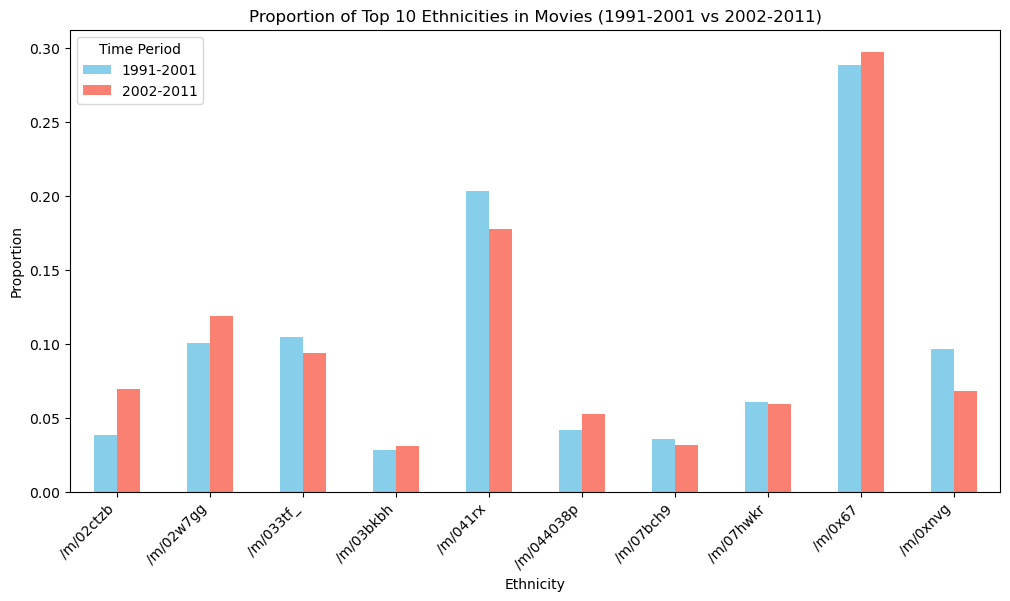

In [33]:
# Filter data for movies released between 1990 and 2001
data_1991_2001 = character_US[(character_US['Movie_Release_Year'] >= 1991) & 
                                    (character_US['Movie_Release_Year'] <= 2001)]
data_2002_2011 = character_US[(character_US['Movie_Release_Year'] >= 2002) & 
                                    (character_US['Movie_Release_Year'] <= 2011)]

# Count the top 10 ethnicities overall
top_ethnicities = character_US['Actor_Ethnicity'].value_counts().nlargest(10).index

# Filter for only these top ethnicities in each subset
data_1991_2001_top = data_1991_2001[data_1991_2001['Actor_Ethnicity'].isin(top_ethnicities)]
data_2002_2011_top = data_2002_2011[data_2002_2011['Actor_Ethnicity'].isin(top_ethnicities)]

# Count occurrences for each ethnicity in each time period
ethnicity_counts_1991_2001 = data_1991_2001_top['Actor_Ethnicity'].value_counts(normalize=True)
ethnicity_counts_2002_2011 = data_2002_2011_top['Actor_Ethnicity'].value_counts(normalize=True)

# Combine into a DataFrame for plotting
ethnicity_proportions = pd.DataFrame({
    '1991-2001': ethnicity_counts_1991_2001,
    '2002-2011': ethnicity_counts_2002_2011
})

# Plotting
ethnicity_proportions.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title("Proportion of Top 10 Ethnicities in Movies (1991-2001 vs 2002-2011)")
plt.xlabel("Ethnicity")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Time Period")
plt.show()

From the top 10 ethnicities already isolated in the first part we observe no major changes before and fter 9/11.  

Now we will look if other all the different ethnicites some experienced major changes before and after 9/11. 

In [34]:
# Count the occurrences of each ethnicity in each period
ethnicity_counts_1991_2001 = data_1991_2001['Actor_Ethnicity'].value_counts()
ethnicity_counts_2002_2011 = data_2002_2011['Actor_Ethnicity'].value_counts()

# We compute the relative changes for each ethnicites between 1991 and 2011
#Use absolute value to avoid the negative value and for subsequnet isolation of smaller and largest relative difference 
ratio = np.abs(ethnicity_counts_1991_2001 - ethnicity_counts_2002_2011) / (ethnicity_counts_1991_2001)


# Sort by the ratio to find the largest 
largest_ratios = ratio.nlargest(10)


# Print the ethnicities with the largest relative difference
print("5 Largest Ratios:\n", largest_ratios)



5 Largest Ratios:
 Actor_Ethnicity
/m/017sq0     16.000000
/m/012f86     14.000000
/m/0b__fv3    13.000000
/m/0g0x7_     12.500000
/m/09zyn5      9.500000
/m/019kn7      9.333333
/m/0912ll      9.000000
/m/09fqz7      9.000000
/m/0h8mzsl     9.000000
/m/01mw1s      8.000000
Name: count, dtype: float64


For value above 1 the relative change is significant. Here we observe singificant changes between 1991 and 2011 => need further analysis with the corresponding on freebase ID.